[2022 competition link]('https://adventofcode.com/2022')

--- Day 1: Calorie Counting --- 

Santa's reindeer typically eat regular reindeer food, but they need a lot of magical energy to deliver presents on Christmas. For that, their favorite snack is a special type of star fruit that only grows deep in the jungle. The Elves have brought you on their annual expedition to the grove where the fruit grows.

To supply enough magical energy, the expedition needs to retrieve a minimum of fifty stars by December 25th. Although the Elves assure you that the grove has plenty of fruit, you decide to grab any fruit you see along the way, just in case.

Collect stars by solving puzzles. Two puzzles will be made available on each day in the Advent calendar; the second puzzle is unlocked when you complete the first. Each puzzle grants one star. Good luck!

The jungle must be too overgrown and difficult to navigate in vehicles or access from the air; the Elves' expedition traditionally goes on foot. As your boats approach land, the Elves begin taking inventory of their supplies. One important consideration is food - in particular, the number of Calories each Elf is carrying (your puzzle input).

The Elves take turns writing down the number of Calories contained by the various meals, snacks, rations, etc. that they've brought with them, one item per line. Each Elf separates their own inventory from the previous Elf's inventory (if any) by a blank line.

For example, suppose the Elves finish writing their items' Calories and end up with the following list:

```
1000
2000
3000

4000

5000
6000

7000
8000
9000

10000
```
This list represents the Calories of the food carried by five Elves:

- The first Elf is carrying food with 1000, 2000, and 3000 Calories, a total of 6000 Calories.
- The second Elf is carrying one food item with 4000 Calories.
- The third Elf is carrying food with 5000 and 6000 Calories, a total of 11000 Calories.
- The fourth Elf is carrying food with 7000, 8000, and 9000 Calories, a total of 24000 Calories.
- The fifth Elf is carrying one food item with 10000 Calories.

In case the Elves get hungry and need extra snacks, they need to know which Elf to ask: they'd like to know how many Calories are being carried by the Elf carrying the most Calories. In the example above, this is 24000 (carried by the fourth Elf).

Find the Elf carrying the most Calories. How many total Calories is that Elf carrying?

In [51]:
# TODO: перписать на тхт-файл

input_string = '''6529
8085
4534
1503
2983
5030
2135
5866
5092
5059
1232

15219
7137
2691
2898
1798

4495
2146
3114
5971
2023
2326
6386
4454
2632
3077
2878
2850

8347
4368
2646
3785
8383
1847
10738
4345

1561
5338
3783
4897
3623
6192
2419
6170
1459
1708
4129
4703
3723
5623

4684
4823
1065
2276

5594
2941
3455
3358
4167
4799
3685
3151
3152
1653
5886
5390
1322

5305
3665
1763
3359
1851
2194
7262
5151
6598
6326
3639

7665
4909
5829
6440
7734
7955
5366
8355
3715
5227

13214
14041
16730
5522

1594
5656
2728
5500
7330
7734
7427
3196
1523
1596

4125
5353
6549
6118
1294
1272
7007
5572
4896
3169
7709

1252
9688
2823
7172
8492
4208
1800
5715
3152

3186
12541
19573

11484
8691
11020
2916
1963
12731

1451
14095
6033
8075
10327

5059
1674
5504
5870
6537
3352
7099
5695

1238
6348
3080
2109
8335
5178
5324
8800
6917

5791
2597
4437
4446
2491
5246
5065
2294
1523
2427
5077
3624

29241
1823

4907
4748
4849
5602
1965
1184
2380
3794
4338
1647
5942
2999
4634
1627
5374

3929
3291
4898
6074
5349
3256
5042
4300
2866
1660
5942
4029
3301
4653

6239
3830
1773
4081
1078
6356
1570
5862
3328
5806
4974
6552
2162

62947

11189
2609
1987
6087
7704

6355
15744
4331
14437

10677
3241
7979
3643
1131
7711
2069
3945

5626
7282
10610
5553
9387
2196
6064
8325

2376
5418
5256
2834
5146
1356
5956
3389
2357
3216
1988
1264
2620
1334
4345

3774
4300
5766
8511
1535
1431
4666
2073
8279
6881

4788
6221
3354
2403
9211
1869

6052
6845
1214
3467
2008
1129
4537
1810
4805
2752
1294
3764

5326
2255
6754
3961
2481
3493
1696
5639
8564
5161

4773
1683
3104
6495
6879
1932
1894
4526
5013
3114
3956
2401
1211

10777

4328
1321
3656
4368
3932
5701
4040
1146
6344
2406
6461
6133
5276
1058

10525
2492
1508
7667
3349
4659
8078
9070

6095
6001
9615
11546
9401
1185
9038

7528
3118
12935
13110
1345

5863
3750
1911
1501
3564
5163
5684
1544
1535
1009
3071
4870
2717

10390
1714
12404
3155
5534

5965
8382
1849
1844
7654
9554
3685
6535

3281
7001
4418
1128
7339
5821
7149
2368
2086
7218
5802
5233

9320

1200
7288
8100
8743
5675
4827
3289
2862
8348

16472
18172
16411
16413

7073
1820
8120
7426
6211
1610
5391
7900

4090
4417
5467
5302
4528
3809
4313
1853
3770
3602
6049
3511
5848
2778
3514

3874
5419
2536
6061
5871
3103
4837
2054
2506
2473
3696
1648
2932
1520
5730

69921

8742
8516
14482
12871
8146

5021
1804
1718
2605
4966
5385
2086
5648
3237
5928
5856
3234
2297
4183

3940
3186
1121
5004
9081
8588
7769
2550

7876
8684
4238
6074
9447
1273
4027
8267
2911

1478
4303
6935
3396
2043
3050
1902
4931
3412
3110
2572
2105
6598

2899
2696
2432
1589
5805
5805
4449
5500
2118
3318
2042
4366
1067
3348
3660

7248
3934
6003
4893
8136
10163

18757
22220
5027

3657
8529
2498
2381
3308
3133
6646
1892
7461

49084

46725

2961
5118
4034
2690
5181
5797
5978
1013
6579
7485

17005
16457

6120
5668
6006
3880
1494
6090
5394
3980
1051
1125
1411
4546
1840

28701

6038
7823
3235
7303
3904
2572
1478
8661
2921
1287

1387
2751
4748
2307
2675
2168
5663
7359
7753
3952
3101

11736
4778
1596

3065
3481
1775
2516
2214
4046
5415
4580
4221
4566
6724
6870
5590

3348
3348
5112
4493
3259
2540
2407
4276
3328
4447
1123
3431
5191
5144
3374

38950

6208
3976
5557
5338
3420
4221
6829
6686
6516
2024
1675
4972

5491
3707
7833
5247
7155

1246
9839
1590
7833
8812
4296

3305
4483
4617
3308
3851
5978
4419
4527
4789
3590
6406
1741
5882
5743

25321
32917

3654
3962
5489
6090
1643
5186
3220
6542
5029
3857
3746

5243
12859
6728
19483

15385
17342

7771
5721
3603
3661
3682
6139
2645
1725
7200
8120

11232
6787
9618
11104
8613
5183
3189

25964
23122
11479

6572
6512
5407
2640
6992
1730
7317
2995
1435
5295
5741

1647
12453
11893
18188

10366
3241
9612
2966
6200
1073
9429
8688

4080
4133
9987
4345
4526
1076
10504

1424
9981
5575
2334
1554
6135
4184
4241

15678
13808
12505
14449
16278

14461
4481

4720
8418
6511
8148
6346
6025
6794
7252
3811
1189

6209
5901
1677
3047
8828
3745
7073
5612
3005

6455
2873
6972
6296
6960
4124
4382
1269
2683
4131
4768

9877
8415
17318
7294

7595
4689
1674
1215
1887
2247
7359
4295
5184
4274
3674

2440
2559
4609
3775
4553
3364
1084
5611
1463
2196
2027
2054
2010
1269
4411

3384
3054
4987
3713
5142
5343
5043
2738
3549
6059

4822
9613
1653
1112
1470
5641
7374
4129

25877
4799
8409

4926
2883
2384
2806
3819
4187
2162
2670
3604
1060
2671
2978
2791
3216
6055

37492

5945
5609
5071
6765
7648
3932
7251
5630
7043
1675
5676

3852
15773
9032
11524

5487
3806
6971
2135
4971
5629
3195
1693
1041
3837
1478
1063

3291
3252
5375
2706
4367
3229
5712
4769
2743
3576
5938
4705
5276
3964

13470
1497
13303
2923
11201

1514
4869
2929
4167
1065
2915
5472
1344
2236
4734
2487

6568
5764
1760
1988
1842
2124
4665
4653
5020
2928
4274
4508
1549

4844
2544
2022
4723
1450
4579
1410
4474
4762
5963
1299
4196
5663
5894
3438

2910
3538
7573
4233
6030
7195
4073
4317
5065
5512
6284

1090
4494
4085
3378
2631
3533
1667
2167
1840
1750
1209
4066
4965
3571
4156

3540
5820
4389
7232
4366
6384
1106
4408
8053
1266

13848
2160
13791
14041
11152

4299
2211
3798
9867
13325
5998

6292
5641
4698
5604
4022
2314
2876
6889
6322
5038
5623
2943
3426

5374
2158
13022
4657
8483
3112

5337
3564
3978
4692
6418
5877
2936
1534
5147
5403
4000
3786
2723
2665

2243
4517
6021
3948
4251
3157
3985
4325
6779
4205
6417
2664

2547
5363
3277
1601
3498
3581
1882
2294
7464
2203
1440
2119

56540

4114
6633
7409
2081
3364
2428
5812
6104
3459
1216
4749

9792

5672
5220
2217
5072
4068
2214
7023
6975
4430
5375
4351
3875

6394
3166
4308
3760
2712
2207
4830
6165
4717
4483
4568
6496
4028

1113
2766
5360
5590
3535
4420
2554
2339
2905
5054
2954
2953
5128
5970
5064

4688
17010
7287

25959
16973

6698
7478
6731
1324
7721
7731
3471
1071
4544
2879
6244

5335
2716
3073
6624
3710
2488
6201
3117

3446
1221
8736
9519
8604
9563
6241
1964
8546

1950
2550
4261
10511
9023
9729
8882

3380
3474
2462
5721
5728
8104
5746
8395
3078

24787
21907
9130

4487
3463
4453
5325
4555
5709
1424
3149
3695
4030
2529
5465
2544
2147
5561

29311
13793

65354

1094
2132
2019
5234
3514
1873
4363
1395
6290
1685
4297

6240
3902
3457
7592
4596
5988
4647
2331
3409
3818
3156

12669
4058
14475
1124

19249
28191

11176
4240
5949
15876
13090

5812
1314
6397
2303
2371
2955
2624
3035
6322
2288
5643
6326
2157

4073
10747
12263
6031
13390

9228
8451
16266
9348
6395

24990
12527
17026

14534
19849
14849
6185

6427
1995
4227
6946
6345
3284
1982
6415
5996
4840
1657
1324

20567
16054
3294

6989
1535
7128
6653
7060
4023
4041
7119
6428
5189
1968
5184

8986
28335

3739
5164
3972
4791
4171
1276
4546
5024
6224
3280
3118
2283
2591

66586

4747
31552

6575
6202
7744
8298
8022
1574
7635
7135
2227

18465
5912

5659
2780
2678
6838
1102
2615
5060
3681
1710
1618
5997
5730
6887

10009
8637
10267
11737

7843
3135
3618
2453
2112
3075
4248
3881
1662
3737
5143

2093
3199
4806
6406
5864
7205
5964
7831
7954
7029
7384

2560
2823

1529
7467
2912
2857
2505
6923
7118
7203
4146
3657
5065
6754

7142
3048
3386
7443
4071
4173
4400
2863
1656
5693
5895
2526

8654
7439
8871
2786
2597
6301
1233
5254

5900
1116
3219
1281
2023
1395
4355
1368
5337
3611
4007
5670
2416
5050
4930

6085
1021
2072
5284
4538
4496
1483
2386
5955
4557
6548
3776

3093
2877
17823
18819

10160
8582
8538
6647
7614
3570

43301

10538
2596
8339
7342
9710
9051
7271
2822

6264
6544
1150
6224
5472
5747
3405
1962
5948

13398
16778
15554
2173

4616
2528
1631
11988
3788
9095
11021

19193

24816

2335
2232
4247
5104
2085
4732
1646
2689
5182
1949
1030
4538
5628
4298
2006

6145
5453
6567
5254
3538
4106
3076
6080
2023
3233
6706
2530
3569

3644
13707
11721
12291
1798
9214

3227
4812
1364
4183
2462
1384
4649
2010
2771
2114
2284
6032
5376
5773

7091
11367
11050
1177
1698
7646
9085

2697
2541
4898
6708
1349
4640
8273
2063
6007
3683

61753

3993
7000
6769
7454
2998
7523
3069
6862
1382

55910

14386
24790

8219
2081
4611
11785
5734
12051

6648
3217
3406
2725
1770
1991
4649
5939
3057
4673
1986
6766
3955

4409
3015
2068
4331
8752
6399
1043
2111

3826
6028
5083
6987
3181
6147
6074
5237
2423
2037
6353
7104

4766
3207
7062
5163
4673
7121
3374
4113
1090
6951
6919

2848
5358
2402
2485
1366
2620
3930
4174
2767
3336
6871

1834
3257
6061
3107
3054
1442
3560
2815
4979
1496
1610
2670
2365
4488
1991

4995
4348
4425
4765
3891
4132
2565
6416
1284
2608
3027
1474
4237

5231
1041
2430
3795
3356
3607
1285
4566
3637
1036
3375
3999
5275
1731

4505
3079
5583
3314
5962
6709
6080
4266
4252
4665
2331
1835
6744

4674
6194
1155
3895
4736
5553
2237
2628
4887
2705
3890
1629
1474
3686

1217
5258
2210
2151
3012
6117
2261
5054
3062
1365
4633
3810
4117
2223

4301
4875
9069
3312
1382
9454

5405
1117
2206
4622
5346
1066
5791
4496
5785
4172
4220
6302
4667
6162

7211
15334

10114
9964
4173
9143
10306
9238
9310
8202

5579
9087
6909
4321
10075
7365
4559
2390

6853
8713
7697
7839
5738
7412
6935
7112
1731
6992

2680
1464
8710
14949
11441

20388
10859

3378
10073
10939
4344
10261
7987

3809
6653
7000
3264
3039
4211
2910
6677
2070
2591
6428

5067
4573
5452
4266
4586
3038
2181
3103
2256
4213
3972
4232
3116
6089

16022
14856
13679
9065
15471

3920
1084
4979
3939
1770
3703
1152
4529
5107
2015
2219
5927
1278
5955
1089

4397
3826
4466
5239
4252
5282
4799
1304
2415
2410
2274
5387
1988
2832
6045

4378
6750
10740
13078
3530
4127

49692

2066
18338
2268
5102

14892
9200
7896
2929
15232

19812
32572

9976
2611
13203
5570
11153
5662

36870
32349

4706
5222
6886
6591
2468
7409
3359
2406
3148
4911
1916

6467
1320
4005
6343
3878
4489
9372
3094
7544

3947
1050
3981
4744
3554
4837
4250
2043
1835
1241
3644
4384
3020
5362
1526

7284
2864
5799
1178
3401
5905
5165
4614
4444
6816
7764

16810
8023

3539
3058
4349
1681
6743
6362
4657
1784
6327
6208
5791
3005
4895

5594
6187
3228
9350
7580
7880
7025
7708
6845

17364
21708
18029

1319
5649
4974
1020
5994
3808
6597
2955
1286
2611
7171
7455

4698
4359
6493
10361
2469
8957
6003
2315

5640
1645
5958
5900
5252
5635
5109
6010
2800
4106
5045
2142
3958

12044
2521
5040
2492
1303

13259
9994
11909
1837
9723
3576

8880
10106
6982
2660
10392
11186
3976

7019
4976
3671
5070
7475
5928
2449
2493
3296
3670

15028
9325
2762
10082
8250

10739
1473
16919

8508
13859
4973
1578

25794
18161
19633

8105
6980
1013

3074
2012
1626
1572
2784
6136
4692
2653
6144
1875
4248
6430
1381
2853

10687
5423
1011
3092
4127

8642
5106
9038
2188
9360
4232
4993
1949
5812

2143
1039
6975
9893
2685
10361

1737
2651
1248
8953
5328
7754
7213
6237
6923

10310
4157
10056
5610
6765
8579
2518
10263

8314
3395
6408
1446
8922
2433
6172
7375
2360

6246
3401
4016
4599
6351
6958
4174
2707
2812
3225
2887
4995
5737

2232
14703
10506

10622
12187
7851
1543
11457

11456
9663
9068
6380
5945

6881
1977
10997
8110
11591
7071
8285

8164
2663
8024
9441
5027
9077
6889
7045
8717'''

In [6]:
with open('day_1.txt', 'r') as f:
    line = f.read()

In [7]:
max_elf_sum = 0

for elf in line.split('\n\n'):
    elfs_bag = elf.split('\n')
    current_elf_sum = 0
    for x in elfs_bag:
        current_elf_sum+=int(x)
        
        if max_elf_sum < current_elf_sum:
            max_elf_sum = current_elf_sum
            

print(max_elf_sum)

72718


--- Part Two ---

By the time you calculate the answer to the Elves' question, they've already realized that the Elf carrying the most Calories of food might eventually run out of snacks.

To avoid this unacceptable situation, the Elves would instead like to know the total Calories carried by the top three Elves carrying the most Calories. That way, even if one of those Elves runs out of snacks, they still have two backups.

In the example above, the top three Elves are the fourth Elf (with 24000 Calories), then the third Elf (with 11000 Calories), then the fifth Elf (with 10000 Calories). The sum of the Calories carried by these three elves is 45000.

Find the top three Elves carrying the most Calories. How many Calories are those Elves carrying in total?

In [9]:
sum_of_elfes = []

for elf in line.split('\n\n'):
    elfs_bag = elf.split('\n')
    current_elf_sum = 0
    for x in elfs_bag:
        current_elf_sum+=int(x)
        
        sum_of_elfes.append(current_elf_sum)
        
sum_of_elfes.sort(reverse=True)
sum(sum_of_elfes[0:3])

213089

--- Day 2: Rock Paper Scissors ---

The Elves begin to set up camp on the beach. To decide whose tent gets to be closest to the snack storage, a giant Rock Paper Scissors tournament is already in progress.

Rock Paper Scissors is a game between two players. Each game contains many rounds; in each round, the players each simultaneously choose one of Rock, Paper, or Scissors using a hand shape. Then, a winner for that round is selected: Rock defeats Scissors, Scissors defeats Paper, and Paper defeats Rock. If both players choose the same shape, the round instead ends in a draw.

Appreciative of your help yesterday, one Elf gives you an encrypted strategy guide (your puzzle input) that they say will be sure to help you win. "The first column is what your opponent is going to play: A for Rock, B for Paper, and C for Scissors. The second column--" Suddenly, the Elf is called away to help with someone's tent.

The second column, you reason, must be what you should play in response: X for Rock, Y for Paper, and Z for Scissors. Winning every time would be suspicious, so the responses must have been carefully chosen.

The winner of the whole tournament is the player with the highest score. Your total score is the sum of your scores for each round. The score for a single round is the score for the shape you selected (1 for Rock, 2 for Paper, and 3 for Scissors) plus the score for the outcome of the round (0 if you lost, 3 if the round was a draw, and 6 if you won).

Since you can't be sure if the Elf is trying to help you or trick you, you should calculate the score you would get if you were to follow the strategy guide.

For example, suppose you were given the following strategy guide:

A Y\
B X\
C Z

This strategy guide predicts and recommends the following:

In the first round, your opponent will choose Rock (A), and you should choose Paper (Y). This ends in a win for you with a score of 8 (2 because you chose Paper + 6 because you won).
In the second round, your opponent will choose Paper (B), and you should choose Rock (X). This ends in a loss for you with a score of 1 (1 + 0).
The third round is a draw with both players choosing Scissors, giving you a score of 3 + 3 = 6.
In this example, if you were to follow the strategy guide, you would get a total score of 15 (8 + 1 + 6).

What would your total score be if everything goes exactly according to your strategy guide?

In [54]:
scores_elf = {'Y': 2, 'X': 1, 'Z': 3}

scores_game = {'Lose':0, 'Draw':3, 'Win':6}

lose_pairs = {
    "Rock": "Scissors",
    "Scissors": "Paper",
    "Paper": "Rock"
}

elf_1_dict = {
    'A': 'Rock',
    'B': 'Paper',
    'C': 'Scissors'}

elf_2_dict = {
    'X': 'Rock',
    'Y': 'Paper',
    'Z': 'Scissors'}

In [55]:
total_counter = 0

with open("day_2.txt", "r") as file1:
    # итерация по строкам
    for line in file1:

        elf_hand = 0
        result = ''
        
        elf_1, elf_2 = line.replace('\n', '').split(' ')
                        
        if elf_1_dict[elf_1] == elf_2_dict[elf_2]:
            result = 'Draw'
            elf_hand = scores_elf[elf_2]
        
        else:
            
            for i, j in lose_pairs.items():
                
                if elf_1_dict[elf_1] == i and elf_2_dict[elf_2] == j:
                    result = 'Lose'
                    elf_hand = scores_elf[elf_2]
                    
                elif elf_2_dict[elf_2] == i and elf_1_dict[elf_1] == j:
                    result = 'Win'
                    elf_hand = scores_elf[elf_2]
                    
        total_counter+=scores_game[result]
        total_counter+=elf_hand
        
total_counter

11063

--- Part Two ---

The Elf finishes helping with the tent and sneaks back over to you. "Anyway, the second column says how the round needs to end: X means you need to lose, Y means you need to end the round in a draw, and Z means you need to win. Good luck!"

The total score is still calculated in the same way, but now you need to figure out what shape to choose so the round ends as indicated. The example above now goes like this:

In the first round, your opponent will choose Rock (A), and you need the round to end in a draw (Y), so you also choose Rock. This gives you a score of 1 + 3 = 4.
In the second round, your opponent will choose Paper (B), and you choose Rock so you lose (X) with a score of 1 + 0 = 1.
In the third round, you will defeat your opponent's Scissors with Rock for a score of 1 + 6 = 7.
Now that you're correctly decrypting the ultra top secret strategy guide, you would get a total score of 12.

Following the Elf's instructions for the second column, what would your total score be if everything goes exactly according to your strategy guide?

In [64]:
result_list = {'Y': 'Draw', 'X': 'Lose', 'Z': 'Win'}
scores_elf_result = {'B': 2, 'A': 1, 'C': 3}
scores_elf_hand = {'Rock': 1, 'Paper': 2, 'Scissors': 3}

scores_game = {'Lose':0, 'Draw':3, 'Win':6}


elf_1_dict = {
    'A': 'Rock',
    'B': 'Paper',
    'C': 'Scissors'}


lose_pairs = {
    "Rock": "Scissors",
    "Scissors": "Paper",
    "Paper": "Rock"
}


win_pairs = {
    "Rock": "Paper",
    "Scissors": "Rock",
    "Paper": "Scissors"
}

total_counter = 0


with open("day_2.txt", "r") as file1:
    
    lines = file1.readlines()
    # итерация по строкам
    for line in lines:

        elf_hand = 0
        result = ''
        
        elf_1, result_code = line.split(' ')
        
        if result_list[result_code] == 'Lose':
                
            result = 'Lose'
            elf_2 = lose_pairs[elf_1_dict[elf_1]]
            elf_hand = scores_elf_hand[elf_2]
                
        elif result_list[result_code] == 'Win':
            
            result = 'Win'
            elf_2 = win_pairs[elf_1_dict[elf_1]]
            elf_hand = scores_elf_hand[elf_2]
                                
        else:
            
            result = 'Draw'
            elf_2 = elf_1
            elf_hand = scores_elf_result[elf_2]
                                                
        total_counter+=scores_game[result]
        total_counter+=elf_hand

        
total_counter

10349

--- Day 3: Rucksack Reorganization ---

One Elf has the important job of loading all of the rucksacks with supplies for the jungle journey. Unfortunately, that Elf didn't quite follow the packing instructions, and so a few items now need to be rearranged.

Each rucksack has two large compartments. All items of a given type are meant to go into exactly one of the two compartments. The Elf that did the packing failed to follow this rule for exactly one item type per rucksack.

The Elves have made a list of all of the items currently in each rucksack (your puzzle input), but they need your help finding the errors. Every item type is identified by a single lowercase or uppercase letter (that is, a and A refer to different types of items).

The list of items for each rucksack is given as characters all on a single line. A given rucksack always has the same number of items in each of its two compartments, so the first half of the characters represent items in the first compartment, while the second half of the characters represent items in the second compartment.

For example, suppose you have the following list of contents from six rucksacks:

vJrwpWtwJgWrhcsFMMfFFhFp\
jqHRNqRjqzjGDLGLrsFMfFZSrLrFZsSL\
PmmdzqPrVvPwwTWBwg\
wMqvLMZHhHMvwLHjbvcjnnSBnvTQFn\
ttgJtRGJQctTZtZT\
CrZsJsPPZsGzwwsLwLmpwMDw

- The first rucksack contains the items vJrwpWtwJgWrhcsFMMfFFhFp, which means its first compartment contains the items vJrwpWtwJgWr, while the second compartment contains the items hcsFMMfFFhFp. The only item type that appears in both compartments is lowercase p.
- The second rucksack's compartments contain jqHRNqRjqzjGDLGL and rsFMfFZSrLrFZsSL. The only item type that appears in both compartments is uppercase L.
- The third rucksack's compartments contain PmmdzqPrV and vPwwTWBwg; the only common item type is uppercase P.
- The fourth rucksack's compartments only share item type v.
- The fifth rucksack's compartments only share item type t.
- The sixth rucksack's compartments only share item type s.
  
To help prioritize item rearrangement, every item type can be converted to a priority:

- Lowercase item types a through z have priorities 1 through 26.
- Uppercase item types A through Z have priorities 27 through 52.

In the above example, the priority of the item type that appears in both compartments of each rucksack is 16 (p), 38 (L), 42 (P), 22 (v), 20 (t), and 19 (s); the sum of these is 157.

Find the item type that appears in both compartments of each rucksack. What is the sum of the priorities of those item types?

In [154]:
import string

# string.ascii_letters

In [80]:
def magic_elf_function(string_from_file):
    string_len = int(len(string_from_file)/2)
    
    first_part = string_from_file[:string_len]
    second_part = string_from_file[string_len:]
    
    for i in first_part:
        if i in second_part:
            return string.ascii_letters.index(i)+1

In [85]:
total_counter = 0

with open("day_3.txt", "r") as file1:
    lines = file1.readlines()
    # итерация по строкам
    for line in lines:
        count = magic_elf_function(line)
        total_counter+= count
        
        
total_counter

8233

--- Part Two ---

As you finish identifying the misplaced items, the Elves come to you with another issue.

For safety, the Elves are divided into groups of three. Every Elf carries a badge that identifies their group. For efficiency, within each group of three Elves, the badge is the only item type carried by all three Elves. That is, if a group's badge is item type B, then all three Elves will have item type B somewhere in their rucksack, and at most two of the Elves will be carrying any other item type.

The problem is that someone forgot to put this year's updated authenticity sticker on the badges. All of the badges need to be pulled out of the rucksacks so the new authenticity stickers can be attached.

Additionally, nobody wrote down which item type corresponds to each group's badges. The only way to tell which item type is the right one is by finding the one item type that is common between all three Elves in each group.

Every set of three lines in your list corresponds to a single group, but each group can have a different badge item type. So, in the above example, the first group's rucksacks are the first three lines:

vJrwpWtwJgWrhcsFMMfFFhFp\
jqHRNqRjqzjGDLGLrsFMfFZSrLrFZsSL\
PmmdzqPrVvPwwTWBwg

And the second group's rucksacks are the next three lines:

wMqvLMZHhHMvwLHjbvcjnnSBnvTQFn\
ttgJtRGJQctTZtZT\
CrZsJsPPZsGzwwsLwLmpwMDw

In the first group, the only item type that appears in all three rucksacks is lowercase r; this must be their badges. In the second group, their badge item type must be Z.

Priorities for these items must still be found to organize the sticker attachment efforts: here, they are 18 (r) for the first group and 52 (Z) for the second group. The sum of these is 70.

Find the item type that corresponds to the badges of each three-Elf group. What is the sum of the priorities of those item types?

In [190]:
with open("day_3.txt", "r") as file1:
    lines = file1.readlines()
    
    lines_list = [line.replace('\n', '') for line in lines]

In [191]:
from itertools import zip_longest

groups = list(zip_longest(*[iter(lines_list)]*3, fillvalue=''))

In [203]:
total_points = 0

for list_3_string in groups:
    list_3_string = list(list_3_string)
    min_element = ''
    
    for list_element in list_3_string:
        if len(min_element) == 0 and len(list_element)!=0:
            min_element = list_element
        elif len(list_element)!=0 and len(min_element)>len(list_element):
            min_element = list_element
    
    list_3_string.remove(min_element)
    
    min_element = set(min_element)
    
    for char in min_element:
        if char in list_3_string[0] and char in list_3_string[1]:
                        
            letter_point = string.ascii_letters.index(char)+1
            
            total_points += letter_point
            
total_points

2821

--- Day 4: Camp Cleanup ---

Space needs to be cleared before the last supplies can be unloaded from the ships, and so several Elves have been assigned the job of cleaning up sections of the camp. Every section has a unique ID number, and each Elf is assigned a range of section IDs.

However, as some of the Elves compare their section assignments with each other, they've noticed that many of the assignments overlap. To try to quickly find overlaps and reduce duplicated effort, the Elves pair up and make a big list of the section assignments for each pair (your puzzle input).

For example, consider the following list of section assignment pairs:

2-4,6-8\
2-3,4-5\
5-7,7-9\
2-8,3-7\
6-6,4-6\
2-6,4-8

For the first few pairs, this list means:

- Within the first pair of Elves, the first Elf was assigned sections 2-4 (sections 2, 3, and 4), while the second Elf was assigned sections 6-8 (sections 6, 7, 8).
- The Elves in the second pair were each assigned two sections.
- The Elves in the third pair were each assigned three sections: one got sections 5, 6, and 7, while the other also got 7, plus 8 and 9.

This example list uses single-digit section IDs to make it easier to draw; your actual list might contain larger numbers. Visually, these pairs of section assignments look like this:

.234.....  2-4\
.....678.  6-8\

.23......  2-3\
...45....  4-5\

....567..  5-7\
......789  7-9\

.2345678.  2-8\
..34567..  3-7\

.....6...  6-6\
...456...  4-6\

.23456...  2-6\
...45678.  4-8

Some of the pairs have noticed that one of their assignments fully contains the other. For example, 2-8 fully contains 3-7, and 6-6 is fully contained by 4-6. In pairs where one assignment fully contains the other, one Elf in the pair would be exclusively cleaning sections their partner will already be cleaning, so these seem like the most in need of reconsideration. In this example, there are 2 such pairs.

In how many assignment pairs does one range fully contain the other?

In [218]:
counter = 0

with open("day_4.txt", "r") as file1:
    lines = file1.readlines()
    
    for element in lines:
        list_elem= element.replace('\n', '').split(',')
        
        a,b = list_elem[0].split('-')
        a,b = int(a), int(b)
        
        
        c,d = list_elem[1].split('-')
        c,d = int(c), int(d)
        
        if (a <= c and b >= d) or (c <= a and d >= b):
            counter+=1


counter

483

--- Part Two ---

It seems like there is still quite a bit of duplicate work planned. Instead, the Elves would like to know the number of pairs that overlap at all.

In the above example, the first two pairs (2-4,6-8 and 2-3,4-5) don't overlap, while the remaining four pairs (5-7,7-9, 2-8,3-7, 6-6,4-6, and 2-6,4-8) do overlap:

- 5-7,7-9 overlaps in a single section, 7.
- 2-8,3-7 overlaps all of the sections 3 through 7.
- 6-6,4-6 overlaps in a single section, 6.
- 2-6,4-8 overlaps in sections 4, 5, and 6.
  
So, in this example, the number of overlapping assignment pairs is 4.

In how many assignment pairs do the ranges overlap?



In [222]:
counter = 0

with open("day_4.txt", "r") as file1:
    lines = file1.readlines()
    
    for element in lines:
        list_elem= element.replace('\n', '').split(',')
        
        a,b = list_elem[0].split('-')
        a,b = int(a), int(b)
        
        
        c,d = list_elem[1].split('-')
        c,d = int(c), int(d)
        
        x = range(a,b+1)
        y = range(c,d+1)
        xs = set(x)
        
        if len(xs.intersection(y)) !=0:    
            counter+=1


counter

874

--- Day 5: Supply Stacks ---

The expedition can depart as soon as the final supplies have been unloaded from the ships. Supplies are stored in stacks of marked crates, but because the needed supplies are buried under many other crates, the crates need to be rearranged.

The ship has a giant cargo crane capable of moving crates between stacks. To ensure none of the crates get crushed or fall over, the crane operator will rearrange them in a series of carefully-planned steps. After the crates are rearranged, the desired crates will be at the top of each stack.

The Elves don't want to interrupt the crane operator during this delicate procedure, but they forgot to ask her which crate will end up where, and they want to be ready to unload them as soon as possible so they can embark.

They do, however, have a drawing of the starting stacks of crates and the rearrangement procedure (your puzzle input). For example:

```
    [D]
[N] [C]
[Z] [M] [P]
 1   2   3 
```

```
move 1 from 2 to 1
move 3 from 1 to 3
move 2 from 2 to 1
move 1 from 1 to 2
```

In this example, there are three stacks of crates. Stack 1 contains two crates: crate Z is on the bottom, and crate N is on top. Stack 2 contains three crates; from bottom to top, they are crates M, C, and D. Finally, stack 3 contains a single crate, P.

Then, the rearrangement procedure is given. In each step of the procedure, a quantity of crates is moved from one stack to a different stack. In the first step of the above rearrangement procedure, one crate is moved from stack 2 to stack 1, resulting in this configuration:

```
[D]
[N] [C]
[Z] [M] [P]
 1   2   3
```

In the second step, three crates are moved from stack 1 to stack 3. Crates are moved one at a time, so the first crate to be moved (D) ends up below the second and third crates:

```
        [Z]
        [N]
    [C] [D]
    [M] [P]
 1   2   3
```

Then, both crates are moved from stack 2 to stack 1. Again, because crates are moved one at a time, crate C ends up below crate M:

```
        [Z]
        [N]
[M]     [D]
[C]     [P]
 1   2   3
```

Finally, one crate is moved from stack 1 to stack 2:

```
        [Z]
        [N]
        [D]
[C] [M] [P]
 1   2   3
```

The Elves just need to know which crate will end up on top of each stack; in this example, the top crates are C in stack 1, M in stack 2, and Z in stack 3, so you should combine these together and give the Elves the message CMZ.

After the rearrangement procedure completes, what crate ends up on top of each stack?

```
[G]                 [D] [R]        
[W]         [V]     [C] [T] [M]    
[L]         [P] [Z] [Q] [F] [V]    
[J]         [S] [D] [J] [M] [T] [V]
[B]     [M] [H] [L] [Z] [J] [B] [S]
[R] [C] [T] [C] [T] [R] [D] [R] [D]
[T] [W] [Z] [T] [P] [B] [B] [H] [P]
[D] [S] [R] [D] [G] [F] [S] [L] [Q]
```

In [58]:
with open("day_5.txt", "r") as file1:
    lines = file1.readlines()[10:]

In [76]:
stack = [["G", "W", "L", "J", "B", "R", "T", "D"],
         ["C", "W", "S"],
         ["M", "T", "Z", "R"],
         ["V", "P", "S", "H", "C", "T", "D"],
         ["Z", "D", "L", "T", "P", "G"],
         ["D", "C", "Q", "J", "Z", "R", "B", "F"],
         ["R", "T", "F", "M", "J", "D", "B", "S"],
         ["M", "V", "T", "B", "R", "H", "L"],
         ["V", "S", "D", "P", "Q"],
         ]

for line in lines:
    
    line = line.split(' ')
    
    crates_count = int(line[1])
    column_number_from = int(line[3])-1
    column_number_to = int(line[5].replace('\n', ''))-1
        
    crates_list = stack[column_number_from][0:crates_count]
    
    stack[column_number_from] = stack[column_number_from][crates_count:]
    stack[column_number_to] = crates_list[::-1] + stack[column_number_to]
    # stack[column_number_to] = stack[column_number_to]
    

for i in stack:
    print(i[0], sep=" ", end="")

SHMSDGZVC

--- Part Two ---

As you watch the crane operator expertly rearrange the crates, you notice the process isn't following your prediction.

Some mud was covering the writing on the side of the crane, and you quickly wipe it away. The crane isn't a CrateMover 9000 - it's a CrateMover 9001.

The CrateMover 9001 is notable for many new and exciting features: air conditioning, leather seats, an extra cup holder, and the ability to pick up and move multiple crates at once.

Again considering the example above, the crates begin in the same configuration:

```
    [D]    
[N] [C]    
[Z] [M] [P]
 1   2   3 
```

Moving a single crate from stack 2 to stack 1 behaves the same as before:

```
[D]        
[N] [C]    
[Z] [M] [P]
 1   2   3 
```

However, the action of moving three crates from stack 1 to stack 3 means that those three moved crates stay in the same order, resulting in this new configuration:

```
        [D]
        [N]
    [C] [Z]
    [M] [P]
 1   2   3
```

Next, as both crates are moved from stack 2 to stack 1, they retain their order as well:

```
        [D]
        [N]
[C]     [Z]
[M]     [P]
 1   2   3
```

Finally, a single crate is still moved from stack 1 to stack 2, but now it's crate C that gets moved:

```
        [D]
        [N]
        [Z]
[M] [C] [P]
 1   2   3
```

In this example, the CrateMover 9001 has put the crates in a totally different order: MCD.

Before the rearrangement process finishes, update your simulation so that the Elves know where they should stand to be ready to unload the final supplies. After the rearrangement procedure completes, what crate ends up on top of each stack?

In [77]:
stack = [["G", "W", "L", "J", "B", "R", "T", "D"],
         ["C", "W", "S"],
         ["M", "T", "Z", "R"],
         ["V", "P", "S", "H", "C", "T", "D"],
         ["Z", "D", "L", "T", "P", "G"],
         ["D", "C", "Q", "J", "Z", "R", "B", "F"],
         ["R", "T", "F", "M", "J", "D", "B", "S"],
         ["M", "V", "T", "B", "R", "H", "L"],
         ["V", "S", "D", "P", "Q"],
         ]

for line in lines:
    
    line = line.split(' ')
    
    crates_count = int(line[1])
    column_number_from = int(line[3])-1
    column_number_to = int(line[5].replace('\n', ''))-1
        
    crates_list = stack[column_number_from][0:crates_count]
    
    stack[column_number_from] = stack[column_number_from][crates_count:]
    stack[column_number_to] = crates_list + stack[column_number_to]
    # stack[column_number_to] = stack[column_number_to]
    

for i in stack:
    print(i[0], sep=" ", end="")

VRZGHDFBQ

--- Day 6: Tuning Trouble ---

The preparations are finally complete; you and the Elves leave camp on foot and begin to make your way toward the star fruit grove.

As you move through the dense undergrowth, one of the Elves gives you a handheld device. He says that it has many fancy features, but the most important one to set up right now is the communication system.

However, because he's heard you have significant experience dealing with signal-based systems, he convinced the other Elves that it would be okay to give you their one malfunctioning device - surely you'll have no problem fixing it.

As if inspired by comedic timing, the device emits a few colorful sparks.

To be able to communicate with the Elves, the device needs to lock on to their signal. The signal is a series of seemingly-random characters that the device receives one at a time.

To fix the communication system, you need to add a subroutine to the device that detects a start-of-packet marker in the datastream. In the protocol being used by the Elves, the start of a packet is indicated by a sequence of four characters that are all different.

The device will send your subroutine a datastream buffer (your puzzle input); your subroutine needs to identify the first position where the four most recently received characters were all different. Specifically, it needs to report the number of characters from the beginning of the buffer to the end of the first such four-character marker.

For example, suppose you receive the following datastream buffer:

`mjqjpqmgbljsphdztnvjfqwrcgsmlb`

After the first three characters (mjq) have been received, there haven't been enough characters received yet to find the marker. The first time a marker could occur is after the fourth character is received, making the most recent four characters mjqj. Because j is repeated, this isn't a marker.

The first time a marker appears is after the seventh character arrives. Once it does, the last four characters received are jpqm, which are all different. In this case, your subroutine should report the value 7, because the first start-of-packet marker is complete after 7 characters have been processed.

Here are a few more examples:

- `bvwbjplbgvbhsrlpgdmjqwftvncz`: first marker after character 5
- `nppdvjthqldpwncqszvftbrmjlhg`: first marker after character 6
- `nznrnfrfntjfmvfwmzdfjlvtqnbhcprsg`: first marker after character 10
- `zcfzfwzzqfrljwzlrfnpqdbhtmscgvjw`: first marker after character 11

How many characters need to be processed before the first start-of-packet marker is detected?

In [2]:
with open("day_6.txt", "r") as file1:
    lines = file1.readline()

In [3]:
def find_marker(elf_str, window_wide):
    for i in range(len(elf_str)-window_wide):
        cur_window = elf_str[i:i+window_wide]
        
        if len(set(cur_window))== window_wide:
            return (i+window_wide)
        

print(find_marker(lines, 4))

1892


--- Part Two ---

Your device's communication system is correctly detecting packets, but still isn't working. It looks like it also needs to look for messages.

A start-of-message marker is just like a start-of-packet marker, except it consists of 14 distinct characters rather than 4.

Here are the first positions of start-of-message markers for all of the above examples:

- `mjqjpqmgbljsphdztnvjfqwrcgsmlb`: first marker after character 19
- `bvwbjplbgvbhsrlpgdmjqwftvncz`: first marker after character 23
- `nppdvjthqldpwncqszvftbrmjlhg`: first marker after character 23
- `nznrnfrfntjfmvfwmzdfjlvtqnbhcprsg`: first marker after character 29
- `zcfzfwzzqfrljwzlrfnpqdbhtmscgvjw`: first marker after character 26

How many characters need to be processed before the first start-of-message marker is detected?

In [4]:
print(find_marker(lines, 14))

2313


--- Day 7: No Space Left On Device ---

You can hear birds chirping and raindrops hitting leaves as the expedition proceeds. Occasionally, you can even hear much louder sounds in the distance; how big do the animals get out here, anyway?

The device the Elves gave you has problems with more than just its communication system. You try to run a system update:

```
$ system-update --please --pretty-please-with-sugar-on-top
Error: No space left on device
```

Perhaps you can delete some files to make space for the update?

You browse around the filesystem to assess the situation and save the resulting terminal output (your puzzle input). For example:

```
$ cd /
$ ls
dir a
14848514 b.txt
8504156 c.dat
dir d
$ cd a
$ ls
dir e
29116 f
2557 g
62596 h.lst
$ cd e
$ ls
584 i
$ cd ..
$ cd ..
$ cd d
$ ls
4060174 j
8033020 d.log
5626152 d.ext
7214296 k
```

The filesystem consists of a tree of files (plain data) and directories (which can contain other directories or files). The outermost directory is called /. You can navigate around the filesystem, moving into or out of directories and listing the contents of the directory you're currently in.

Within the terminal output, lines that begin with $ are commands you executed, very much like some modern computers:

- `cd` means change directory. This changes which directory is the current directory, but the specific result depends on the argument:
- `cd x` moves in one level: it looks in the current directory for the directory named x and makes it the current directory.
- `cd ..` moves out one level: it finds the directory that contains the current directory, then makes that directory the current directory.
- `cd /` switches the current directory to the outermost directory, `/`.
- `ls` means list. It prints out all of the files and directories immediately contained by the current directory:
    - `123 abc` means that the current directory contains a file named `abc` with size `123`.
    - `dir xyz` means that the current directory contains a directory named `xyz`.
Given the commands and output in the example above, you can determine that the filesystem looks visually like this:

```
- / (dir)
  - a (dir)
    - e (dir)
      - i (file, size=584)
    - f (file, size=29116)
    - g (file, size=2557)
    - h.lst (file, size=62596)
  - b.txt (file, size=14848514)
  - c.dat (file, size=8504156)
  - d (dir)
    - j (file, size=4060174)
    - d.log (file, size=8033020)
    - d.ext (file, size=5626152)
    - k (file, size=7214296)
```

Here, there are four directories: `/` (the outermost directory), `a` and `d` (which are in `/`), and `e` (which is in `a`). These directories also contain files of various sizes.

Since the disk is full, your first step should probably be to find directories that are good candidates for deletion. To do this, you need to determine the total size of each directory. The total size of a directory is the sum of the sizes of the files it contains, directly or indirectly. (Directories themselves do not count as having any intrinsic size.)

The total sizes of the directories above can be found as follows:

- The total size of directory `e` is 584 because it contains a single file `i` of size 584 and no other directories.
- The directory `a` has total size 94853 because it contains files `f` (size 29116), `g` (size 2557), and `h.lst` (size 62596), plus file `i` indirectly (`a` contains `e` which contains `i`).
- Directory `d` has total size 24933642.
- As the outermost directory, `/` contains every file. Its total size is 48381165, the sum of the size of every file.

To begin, find all of the directories with a total size of at most 100000, then calculate the sum of their total sizes. In the example above, these directories are `a` and `e`; the sum of their total sizes is 95437 (94853 + 584). (As in this example, this process can count files more than once!)

Find all of the directories with a total size of at most 100000. What is the sum of the total sizes of those directories?

In [195]:
with open("day_7.txt", "r") as file1:
    lines = [line.strip() for line in file1.readlines()]

In [211]:
path = dict()
sums = dict()

current_path = []

for line in lines:
    line = line.split(' ')
    
    if line[1] == "cd":
        if line[2] == "..":
            current_path.pop()
        else:
            current_path.append(line[2])
            path["".join(current_path)] = []
            sums["".join(current_path)] = 0
    elif line[1] == "ls":
        continue
    elif line[0] == "dir":
        path["".join(current_path)].append("".join(current_path) + line[1])
    else:
        sums["".join(current_path)] += int(line[0])

total_size = dict()
for i in path:
    total_size[i] = 0

def searcher(i):
    if len(path[i]) > 0:
        for j in path[i]:
            searcher(j)  
    cnt.append(sums[i])
    return cnt

for i in path:
    cnt = list()
    cnt = searcher(i)
    total_size[i] += sum(cnt)

result = 0
for i in total_size:
    if total_size[i] <= 100000:
        result += total_size[i]
        

print(result)


1543140


In [212]:
used_space = sum(list(sums.values()))
disc_space = 70000000
unused_space = 30000000
del_val = disc_space

for i in total_size:
    if (used_space - total_size[i]) <= (disc_space - unused_space) and total_size[i] < del_val:
        del_val = total_size[i]

print(del_val)

1117448


--- Day 8: Treetop Tree House ---

The expedition comes across a peculiar patch of tall trees all planted carefully in a grid. The Elves explain that a previous expedition planted these trees as a reforestation effort. Now, they're curious if this would be a good location for a tree house.

First, determine whether there is enough tree cover here to keep a tree house hidden. To do this, you need to count the number of trees that are visible from outside the grid when looking directly along a row or column.

The Elves have already launched a quadcopter to generate a map with the height of each tree (your puzzle input). For example:

```
30373
25512
65332
33549
35390
```

Each tree is represented as a single digit whose value is its height, where 0 is the shortest and 9 is the tallest.

A tree is visible if all of the other trees between it and an edge of the grid are shorter than it. Only consider trees in the same row or column; that is, only look up, down, left, or right from any given tree.

All of the trees around the edge of the grid are visible - since they are already on the edge, there are no trees to block the view. In this example, that only leaves the interior nine trees to consider:

- The top-left 5 is visible from the left and top. (It isn't visible from the right or bottom since other trees of height 5 are in the way.)
- The top-middle 5 is visible from the top and right.
- The top-right 1 is not visible from any direction; for it to be visible, there would need to only be trees of height 0 between it and an edge.
- The left-middle 5 is visible, but only from the right.
- The center 3 is not visible from any direction; for it to be visible, there would need to be only trees of at most height 2 between it and an edge.
- The right-middle 3 is visible from the right.
- In the bottom row, the middle 5 is visible, but the 3 and 4 are not.

With 16 trees visible on the edge and another 5 visible in the interior, a total of 21 trees are visible in this arrangement.

Consider your map; how many trees are visible from outside the grid?

In [234]:
with open("day_8.txt") as f:
    lines = f.readlines()

lines = [i.strip() for i in lines]
forest_grid = [[int(j) for j in i] for i in lines]

# forest_grid

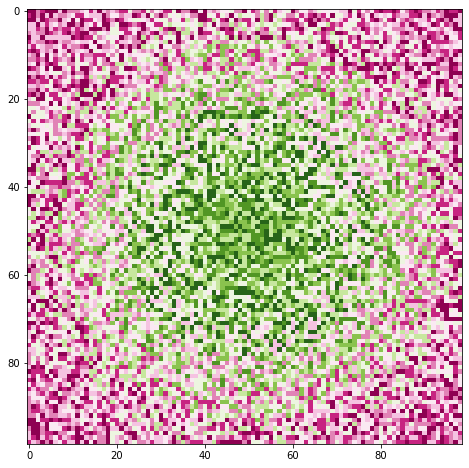

In [243]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.imshow(forest_grid, cmap='PiYG', interpolation='nearest')
plt.show()

In [252]:
total = 0
max_score = 0


for i in range(len(forest_grid)):
    for j in range(len(forest_grid[0])):
        col = [forest_grid[x][j] for x in range(len(forest_grid))]
        l,r,u,d = list(reversed(forest_grid[i][:j])), forest_grid[i][j+1:], list(reversed(col[:i])), col[i+1:]
        if i == 0 or j == 0 or i == len(forest_grid) -1 or j == len(forest_grid[0])-1:
            total += 1
        else:
            left,right = max(l),max(r)
            up,down = max(u),max(d)
            if forest_grid[i][j] > min(up,down,left,right):
                total += 1
        cum_score = 1
        for path in (l,r,u,d):
            score = 1
            for t in range(len(path)):
                if path[t] < forest_grid[i][j]:
                    score += 1
                else:
                    break
                if t == len(path) -1:
                    score -= 1
            cum_score *= score
        if cum_score > max_score:
            max_score = cum_score



answer_one = total
answer_two = max_score


print("p1:", answer_one)
print("p2:", answer_two)

p1: 1698
p2: 672280


--- Day 9: Rope Bridge ---

This rope bridge creaks as you walk along it. You aren't sure how old it is, or whether it can even support your weight.

It seems to support the Elves just fine, though. The bridge spans a gorge which was carved out by the massive river far below you.

You step carefully; as you do, the ropes stretch and twist. You decide to distract yourself by modeling rope physics; maybe you can even figure out where not to step.

Consider a rope with a knot at each end; these knots mark the head and the tail of the rope. If the head moves far enough away from the tail, the tail is pulled toward the head.

Due to nebulous reasoning involving Planck lengths, you should be able to model the positions of the knots on a two-dimensional grid. Then, by following a hypothetical series of motions (your puzzle input) for the head, you can determine how the tail will move.

Due to the aforementioned Planck lengths, the rope must be quite short; in fact, the head (H) and tail (T) must always be touching (diagonally adjacent and even overlapping both count as touching):

```
....
.TH.
....

....
.H..
..T.
....

...
.H. (H covers T)
...
```

If the head is ever two steps directly up, down, left, or right from the tail, the tail must also move one step in that direction so it remains close enough:

```
.....    .....    .....
.TH.. -> .T.H. -> ..TH.
.....    .....    .....

...    ...    ...
.T.    .T.    ...
.H. -> ... -> .T.
...    .H.    .H.
...    ...    ...
```

Otherwise, if the head and tail aren't touching and aren't in the same row or column, the tail always moves one step diagonally to keep up:

```
.....    .....    .....
.....    ..H..    ..H..
..H.. -> ..... -> ..T..
.T...    .T...    .....
.....    .....    .....

.....    .....    .....
.....    .....    .....
..H.. -> ...H. -> ..TH.
.T...    .T...    .....
.....    .....    .....
```

You just need to work out where the tail goes as the head follows a series of motions. Assume the head and the tail both start at the same position, overlapping.

For example:

```
R 4
U 4
L 3
D 1
R 4
D 1
L 5
R 2
```

This series of motions moves the head right four steps, then up four steps, then left three steps, then down one step, and so on. After each step, you'll need to update the position of the tail if the step means the head is no longer adjacent to the tail. Visually, these motions occur as follows (s marks the starting position as a reference point):

```
== Initial State ==

......
......
......
......
H.....  (H covers T, s)

== R 4 ==

......
......
......
......
TH....  (T covers s)

......
......
......
......
sTH...

......
......
......
......
s.TH..

......
......
......
......
s..TH.

== U 4 ==

......
......
......
....H.
s..T..

......
......
....H.
....T.
s.....

......
....H.
....T.
......
s.....

....H.
....T.
......
......
s.....

== L 3 ==

...H..
....T.
......
......
s.....

..HT..
......
......
......
s.....

.HT...
......
......
......
s.....

== D 1 ==

..T...
.H....
......
......
s.....

== R 4 ==

..T...
..H...
......
......
s.....

..T...
...H..
......
......
s.....

......
...TH.
......
......
s.....

......
....TH
......
......
s.....

== D 1 ==

......
....T.
.....H
......
s.....

== L 5 ==

......
....T.
....H.
......
s.....

......
....T.
...H..
......
s.....

......
......
..HT..
......
s.....

......
......
.HT...
......
s.....

......
......
HT....
......
s.....

== R 2 ==

......
......
.H....  (H covers T)
......
s.....

......
......
.TH...
......
s.....
```

After simulating the rope, you can count up all of the positions the tail visited at least once. In this diagram, s again marks the starting position (which the tail also visited) and # marks other positions the tail visited:

```
..##..
...##.
.####.
....#.
s###..
```

So, there are 13 positions the tail visited at least once.

Simulate your complete hypothetical series of motions. How many positions does the tail of the rope visit at least once?

In [47]:
from collections import defaultdict

with open('day_9.txt') as f:
    lines = [ [ l.strip().split(" ")[0], int(l.strip().split(" ")[1]) ] for l in f.readlines() ]

In [50]:
directions = {"R": (+1,0), "L":(-1,0), "U":(0,+1), "D":(0,-1)}

def move_head(c,m):
    return tuple([ i+j for i,j in zip(c,directions[m]) ])

def move_tail(head, head_prev, tail):
    # same position, don't move
    if head==tail: 
        return tail
    xH,yH = head
    xT,yT = tail
    dx = abs(xH-xT)
    dy = abs(yH-yT)
    if dx<=1 and dy<=1: # adiacent, don't move
        return tail
    else:
        if dx<=1 and dy==2:
            return (xH,yH-(yH-yT)//dy)
        elif dx==2 and dy<=1:
            return (xH-(xH-xT)//dx,yH)
        elif dx==2 and dy==2:
            return (xH-(xH-xT)//dx,yH-(yH-yT)//dy)


head = (0,0)
tail = (0,0)
Ht = defaultdict(int)
Tt = defaultdict(int)
Ht[head] = 1
Tt[head] = 1
for d,n in lines:
    for _ in range(n):
        # move Head
        head_prev = head
        head = move_head(head_prev, d)
        Ht[head] += 1
        # move Tail
        tail = move_tail(head, head_prev, tail)
        Tt[tail] += 1

print(len(Tt.keys()))

5619


--- Part Two ---

A rope snaps! Suddenly, the river is getting a lot closer than you remember. The bridge is still there, but some of the ropes that broke are now whipping toward you as you fall through the air!

The ropes are moving too quickly to grab; you only have a few seconds to choose how to arch your body to avoid being hit. Fortunately, your simulation can be extended to support longer ropes.

Rather than two knots, you now must simulate a rope consisting of ten knots. One knot is still the head of the rope and moves according to the series of motions. Each knot further down the rope follows the knot in front of it using the same rules as before.

Using the same series of motions as the above example, but with the knots marked H, 1, 2, ..., 9, the motions now occur as follows:

```
== Initial State ==

......
......
......
......
H.....  (H covers 1, 2, 3, 4, 5, 6, 7, 8, 9, s)

== R 4 ==

......
......
......
......
1H....  (1 covers 2, 3, 4, 5, 6, 7, 8, 9, s)

......
......
......
......
21H...  (2 covers 3, 4, 5, 6, 7, 8, 9, s)

......
......
......
......
321H..  (3 covers 4, 5, 6, 7, 8, 9, s)

......
......
......
......
4321H.  (4 covers 5, 6, 7, 8, 9, s)

== U 4 ==

......
......
......
....H.
4321..  (4 covers 5, 6, 7, 8, 9, s)

......
......
....H.
.4321.
5.....  (5 covers 6, 7, 8, 9, s)

......
....H.
....1.
.432..
5.....  (5 covers 6, 7, 8, 9, s)

....H.
....1.
..432.
.5....
6.....  (6 covers 7, 8, 9, s)

== L 3 ==

...H..
....1.
..432.
.5....
6.....  (6 covers 7, 8, 9, s)

..H1..
...2..
..43..
.5....
6.....  (6 covers 7, 8, 9, s)

.H1...
...2..
..43..
.5....
6.....  (6 covers 7, 8, 9, s)

== D 1 ==

..1...
.H.2..
..43..
.5....
6.....  (6 covers 7, 8, 9, s)

== R 4 ==

..1...
..H2..
..43..
.5....
6.....  (6 covers 7, 8, 9, s)

..1...
...H..  (H covers 2)
..43..
.5....
6.....  (6 covers 7, 8, 9, s)

......
...1H.  (1 covers 2)
..43..
.5....
6.....  (6 covers 7, 8, 9, s)

......
...21H
..43..
.5....
6.....  (6 covers 7, 8, 9, s)

== D 1 ==

......
...21.
..43.H
.5....
6.....  (6 covers 7, 8, 9, s)

== L 5 ==

......
...21.
..43H.
.5....
6.....  (6 covers 7, 8, 9, s)

......
...21.
..4H..  (H covers 3)
.5....
6.....  (6 covers 7, 8, 9, s)

......
...2..
..H1..  (H covers 4; 1 covers 3)
.5....
6.....  (6 covers 7, 8, 9, s)

......
...2..
.H13..  (1 covers 4)
.5....
6.....  (6 covers 7, 8, 9, s)

......
......
H123..  (2 covers 4)
.5....
6.....  (6 covers 7, 8, 9, s)

== R 2 ==

......
......
.H23..  (H covers 1; 2 covers 4)
.5....
6.....  (6 covers 7, 8, 9, s)

......
......
.1H3..  (H covers 2, 4)
.5....
6.....  (6 covers 7, 8, 9, s)
```

Now, you need to keep track of the positions the new tail, 9, visits. In this example, the tail never moves, and so it only visits 1 position. However, be careful: more types of motion are possible than before, so you might want to visually compare your simulated rope to the one above.

Here's a larger example:

```
R 5
U 8
L 8
D 3
R 17
D 10
L 25
U 20
```

These motions occur as follows (individual steps are not shown):

```
== Initial State ==

..........................
..........................
..........................
..........................
..........................
..........................
..........................
..........................
..........................
..........................
..........................
..........................
..........................
..........................
..........................
...........H..............  (H covers 1, 2, 3, 4, 5, 6, 7, 8, 9, s)
..........................
..........................
..........................
..........................
..........................

== R 5 ==

..........................
..........................
..........................
..........................
..........................
..........................
..........................
..........................
..........................
..........................
..........................
..........................
..........................
..........................
..........................
...........54321H.........  (5 covers 6, 7, 8, 9, s)
..........................
..........................
..........................
..........................
..........................

== U 8 ==

..........................
..........................
..........................
..........................
..........................
..........................
..........................
................H.........
................1.........
................2.........
................3.........
...............54.........
..............6...........
.............7............
............8.............
...........9..............  (9 covers s)
..........................
..........................
..........................
..........................
..........................

== L 8 ==

..........................
..........................
..........................
..........................
..........................
..........................
..........................
........H1234.............
............5.............
............6.............
............7.............
............8.............
............9.............
..........................
..........................
...........s..............
..........................
..........................
..........................
..........................
..........................

== D 3 ==

..........................
..........................
..........................
..........................
..........................
..........................
..........................
..........................
.........2345.............
........1...6.............
........H...7.............
............8.............
............9.............
..........................
..........................
...........s..............
..........................
..........................
..........................
..........................
..........................

== R 17 ==

..........................
..........................
..........................
..........................
..........................
..........................
..........................
..........................
..........................
..........................
................987654321H
..........................
..........................
..........................
..........................
...........s..............
..........................
..........................
..........................
..........................
..........................

== D 10 ==

..........................
..........................
..........................
..........................
..........................
..........................
..........................
..........................
..........................
..........................
..........................
..........................
..........................
..........................
..........................
...........s.........98765
.........................4
.........................3
.........................2
.........................1
.........................H

== L 25 ==

..........................
..........................
..........................
..........................
..........................
..........................
..........................
..........................
..........................
..........................
..........................
..........................
..........................
..........................
..........................
...........s..............
..........................
..........................
..........................
..........................
H123456789................

== U 20 ==

H.........................
1.........................
2.........................
3.........................
4.........................
5.........................
6.........................
7.........................
8.........................
9.........................
..........................
..........................
..........................
..........................
..........................
...........s..............
..........................
..........................
..........................
..........................
..........................
```

Now, the tail (9) visits 36 positions (including s) at least once:

```
..........................
..........................
..........................
..........................
..........................
..........................
..........................
..........................
..........................
#.........................
#.............###.........
#............#...#........
.#..........#.....#.......
..#..........#.....#......
...#........#.......#.....
....#......s.........#....
.....#..............#.....
......#............#......
.......#..........#.......
........#........#........
.........########.........
```

Simulate your complete series of motions on a larger rope with ten knots. How many positions does the tail of the rope visit at least once?

In [52]:
# rope length
l=10

# rope element traces
Rt = [ defaultdict(int) for _ in range(l) ]

# rope elements last position
rope = [ (0,0) for _ in range(l) ]

# initial positions
for Kt in Rt:
    Kt[(0,0)] = 1

k=0



for d,n in lines:
    for _ in range(n):
        # move Head
        head_prev = rope[0]
        head = move_head(head_prev,d)
        Rt[0][head] += 1
        rope[0] = head
        # move other rope elements
        for i in range(1,l):
            tail_prev = rope[i]
            tail = move_tail(head, head_prev, tail_prev)
            Rt[i][tail] += 1
            rope[i] = tail
            head = tail
            head_prev = tail_prev


print(len(Rt[9].keys()))

2376
